# Importing Libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset

In [132]:
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/Salary_Data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,NaN,57189


# Extracting Independent and Dependent Variable

In [134]:
X = dataset.iloc[:, 0:1].values
Y = dataset.iloc[:, -1].values

In [135]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ nan],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ nan],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [136]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

In [137]:
dataset.head()
dataset.describe()

,YearsExperience,Salary
count,28.000000,30.000000
mean,5.378571,76003.000000
std,2.923640,27414.429785
min,1.100000,37731.000000
25%,3.150000,56720.750000
50%,4.700000,65237.000000
75%,7.975000,100544.750000
max,10.500000,122391.000000


# Missing Data

In [138]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
X = X.reshape(-1, 1)
X = imputer.fit_transform(X)
print(X)

[[ 1.1       ]
 [ 1.3       ]
 [ 1.5       ]
 [ 2.        ]
 [ 2.2       ]
 [ 2.9       ]
 [ 3.        ]
 [ 3.2       ]
 [ 3.2       ]
 [ 5.37857143]
 [ 3.9       ]
 [ 4.        ]
 [ 4.        ]
 [ 4.1       ]
 [ 4.5       ]
 [ 4.9       ]
 [ 5.37857143]
 [ 5.3       ]
 [ 5.9       ]
 [ 6.        ]
 [ 6.8       ]
 [ 7.1       ]
 [ 7.9       ]
 [ 8.2       ]
 [ 8.7       ]
 [ 9.        ]
 [ 9.5       ]
 [ 9.6       ]
 [10.3       ]
 [10.5       ]]


# Spliting Dataset

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,)

# Training

In [140]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predict

In [141]:
y_pred = regressor.predict(X_test)

# Visualize Train

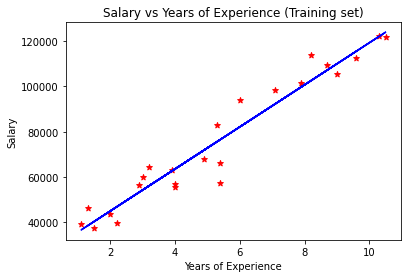

In [142]:
plt.scatter(X_train, y_train, marker='*', color='red')
plt.plot(X_train, regressor.predict(X_train.reshape(-1,1)), color='blue')
plt.title('Salary vs Years of Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


# VIsualize Test

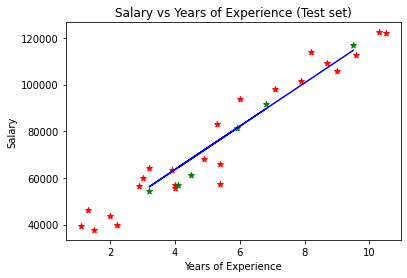

In [143]:
plt.scatter(X_train, y_train, marker='*', color='red')
plt.scatter(X_test, y_test, marker='*',color='green')
plt.plot(X_test, regressor.predict(X_test), color='blue')
plt.title('Salary vs Years of Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
